In [1]:
import math as m

import matplotlib.pyplot as plt
import seaborn as sns

from utils import (
    np,
    deepcopy,
)

from utils import (
    norm_1_vec,
    norm_1,
    norm_2_vec,
    norm_2,
    norm_3_vec,
    norm_3,
    norm_spectral,
    count_norms,
)


# вариант xx. Фамилия Имя


## Решение СЛАУ. Ax = y


In [2]:
eps = 1e-3


## 2-ое задание на метод итераций для СЛАУ

In [47]:
B = np.array(
    [
        [ , , , ],
        [ , , , ],
        [ , , , ],
        [ , , , ],
    ]
)
b = np.array([ , , , ]).reshape(-1, 1)


In [48]:
print(f"B\n{B}", end="\n" * 2)
print(f"b\n{b}")


B
[[ 0.23 -0.14  0.06 -0.12]
 [ 0.12  0.    0.32 -0.18]
 [ 0.08 -0.12  0.23  0.32]
 [ 0.25  0.22  0.14  0.  ]]

b
[[ 1.21]
 [-0.72]
 [-0.58]
 [ 1.56]]


In [49]:
q_collection = count_norms(B)
# нормы меньше 1, то метод сходится
# работать буду с 1-ой нормой
q = q_collection[0]


1-ая норма: 0.75
2-ая норма: 0.75
3-ая норма: 0.5155893972709307


In [50]:
def mi(B, b, x):
    return B @ x + b


In [51]:
# метод сходится при любой начальной инициализации x, так что положим x=0
x_0 = np.zeros(4).reshape(-1, 1)
x = mi(B, b, x_0)

print(f"x_0\n{x_0}")
print(f"x_1\n{x}")


x_0
[[0.]
 [0.]
 [0.]
 [0.]]
x_1
[[ 1.21]
 [-0.72]
 [-0.58]
 [ 1.56]]


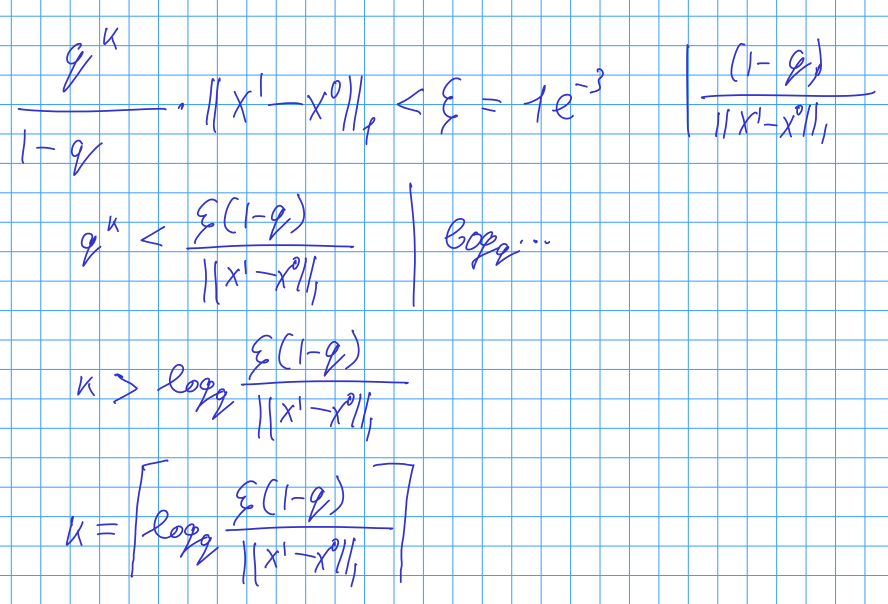

In [52]:
n1 = norm_1_vec(x - x_0)

k = m.ceil(np.log(eps * (1 - q) / n1) / np.log(q))
print(f"k = {k}")


k = 31


In [54]:
# будем считать решение с очень большим приближением эталонным
exact_x = x_0.copy()
for _ in range(int(1e4)):
    exact_x = mi(B, b, exact_x)


In [55]:
x = x_0.copy()
norms = []

for _ in range(k):
    x = mi(B, b, x)
    norms.append(norm_1_vec(x - exact_x))


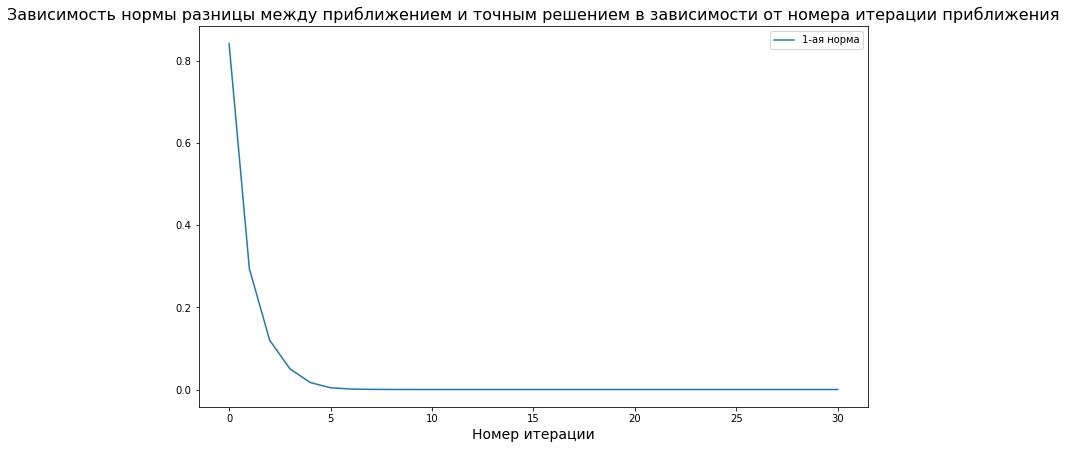

In [56]:
plt.figure(figsize=(12, 7))
sns.lineplot(x=list(range(k)), y=norms, label="1-ая норма")
plt.title(
    "Зависимость нормы разницы между приближением и точным решением в зависимости от номера итерации приближения",
    fontsize=16,
)
plt.xlabel("Номер итерации", fontsize=14)
plt.show()


### Ответ (2-ое задание на метод итераций)

In [61]:
print(f"ответ:\n{x}")


ответ:
[[ 1.45558303]
 [-0.78300921]
 [ 0.26327984]
 [ 1.78849291]]
